To achieve your goal of automatically telnetting into a Cisco router and changing its hostname using Python, let’s break down the task into step-by-step configurations and code explanations.

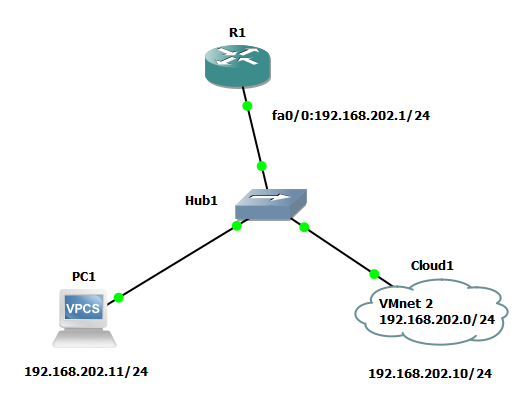

**Step 1: Network Setup Configuration**

Based on the topology provided:

***Router Configuration***

* Set up an IP address for the router interface.
* Enable Telnet access on the router.
* Configure a password for Telnet access.

In [ ]:
R1#configure terminal
R1(config)#interface fastEthernet 0/0
R1(config-if)#ip address 192.168.202.1 255.255.255.0
R1(config-if)#no shutdown
R1(config-if)#exit
R1(config)#line vty 0 4
R1(config-line)#password rahmati
R1(config-line)#login
R1(config-line)#exit
R1(config)#exit
R1#ping 192.168.202.10
Type escape sequence to abort.
Sending 5, 100-byte ICMP Echos to 192.168.202.10, timeout is 2 seconds:
!!!!!
Success rate is 100 percent (5/5), round-trip min/avg/max = 4/12/28 ms
R1#ping 192.168.202.11
Type escape sequence to abort.
Sending 5, 100-byte ICMP Echos to 192.168.202.11, timeout is 2 seconds:
!!!!!
Success rate is 100 percent (5/5), round-trip min/avg/max = 4/8/20 ms
R1#

***PC Configuration***

* Ensure the PC is in the same subnet as the router.
* Test connectivity between the PC and the router.

In [ ]:
PC1> ip 192.168.202.11/24 192.168.202.1
Checking for duplicate address...
PC1 : 192.168.202.11 255.255.255.0 gateway 192.168.202.1

PC1> save
Saving startup configuration to startup.vpc
.  done

PC1> show ip

NAME        : PC1[1]
IP/MASK     : 192.168.202.11/24
GATEWAY     : 192.168.202.1
DNS         :
MAC         : 00:50:79:66:68:00
LPORT       : 20008
RHOST:PORT  : 127.0.0.1:20009
MTU         : 1500

PC1>

**Step 2: Python Code Explanation**

We’ll write a Python script to:

* Use the Telnet protocol to connect to the router.
* Log in with the Telnet password.
* Change the router’s hostname.

We'll use the *telnetlib* module in Python for this.

**Python Code**

Here is the Python script with detailed comments:

In [3]:
import telnetlib

# Step 1: Define the router's IP and login credentials
ROUTER_IP = "192.168.202.1"
TELNET_PORT = 23
TELNET_TIMEOUT = 5
PASSWORD = "rahmati"
NEW_HOSTNAME = "MyNewRouter"

# Step 2: Connect to the router using Telnet
try:
    # Establish a Telnet connection
    tn = telnetlib.Telnet(ROUTER_IP, TELNET_PORT, TELNET_TIMEOUT)
    print(f"Connected to {ROUTER_IP}")

    # Step 3: Log in with the password
    tn.read_until(b"Password:")  # Wait for the password prompt
    tn.write(PASSWORD.encode('ascii') + b"\n")
    print("Login successful")

    # Step 4: Enter enable mode and configure terminal
    tn.write(b"enable\n")
    tn.write(PASSWORD.encode('ascii') + b"\n")
    tn.write(b"configure terminal\n")

    # Step 5: Change the hostname
    tn.write(f"hostname {NEW_HOSTNAME}\n".encode('ascii'))

    # Step 6: Exit and save configuration
    tn.write(b"exit\n")
    tn.write(b"write memory\n")
    tn.write(b"exit\n")

    # Step 7: Read the final output
    print(tn.read_all().decode('ascii'))

except Exception as e:
    print(f"Failed to connect to the router: {e}")

Connected to 192.168.202.1
Login successful
 
R1>enable
Password: 
R1#configure terminal
Enter configuration commands, one per line.  End with CNTL/Z.
R1(config)#hostname MyNewRouter
MyNewRouter(config)#exit
MyNewRouter#write memory
Building configuration...
[OK]
MyNewRouter#exit

